In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import x_sin, sin_cos, generate_data, lstm_model

In [2]:
SAVE_DIR = "/home/daniel/Desktop/lstm"
LOG_DIR = './ops_logs'
TIMESTEPS = 100
RNN_LAYERS = [{'steps': TIMESTEPS}, {'steps': TIMESTEPS}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=2,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE, continue_training=True)

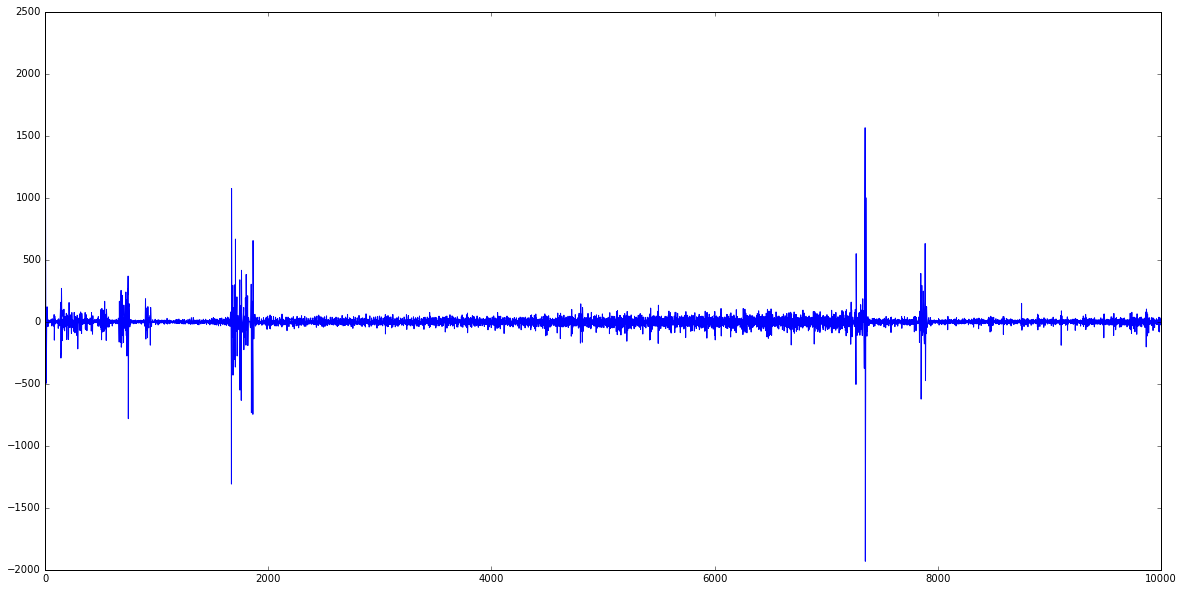

In [4]:
folder = "/home/daniel/Downloads/Raw-Waves/"
filename="001_Session1_FilterTrigCh_RawCh.mat"
#filename="001_Session2_FilterTrigCh_RawCh.mat"
import scipy.io
mat = scipy.io.loadmat(folder+filename)
global raw_wave
raw_wave = mat.get('data')[0]
#raw_wave = raw_wave/max(raw_wave)
raw_wave = raw_wave[::100]
raw_wave = raw_wave[0:]

def raw_waves(x):
  global raw_wave
  return raw_wave[x]

DATA_LENGTH = 10000
plt.figure(figsize=(20,10))
plt.plot(raw_wave[list(range(DATA_LENGTH))])

In [5]:
raw_wave.shape

(117236,)

In [6]:
X, y = generate_data(raw_waves, list(range(DATA_LENGTH)), TIMESTEPS, seperate=False)
assert X['val'].shape[0] != 0
assert X['test'].shape[0] != 0

In [7]:
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=SAVE_DIR)

ValueError: Restore called with invalid save path model.ckpt-9399-?????-of-00001

In [ ]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

In [ ]:
plt.figure(figsize=(20,10))
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])

### Hallucinate

In [ ]:
# Hallucinate a signal
HALLUCINATE_LENGTH = 100
next_x = X['test'][0,None]
hallucinated = []
print("Hallucinating")
print("|                                                  |")
for i in range(HALLUCINATE_LENGTH):
  single_prediction = regressor.predict(next_x)
  # add prediction to the next input
  next_x[:,0:-1,:] = next_x[:,1:,:]
  next_x[:,-1,:] = single_prediction
  # store prediction
  hallucinated.append(single_prediction)
  # progress
  if np.mod(i,HALLUCINATE_LENGTH/50.0) == 0:
    print(".",end="")

In [ ]:
plt.figure(figsize=(20,10))
plot_hallucinated, = plt.plot(hallucinated, label='hallucinated')
plt.legend(handles=[plot_hallucinated])

In [ ]:
regressor.save(SAVE_DIR)

In [ ]:
regressor.restore(SAVE_DIR)

# Annex

In [ ]:
LOG_DIR = './ops_logs'
TIMESTEPS = 10
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [ ]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR+'2')

In [ ]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [ ]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

In [ ]:
plt.plot(predicted)

In [ ]:
plt.plot(y['test'])

In [ ]:
plot_predicted = plt.plot(predicted, label='predicted')
plot_test = plt.plot(y['test'], label='test')
plt.legend(handles=plot_predicted+plot_test)

In [ ]:
LOG_DIR = './ops_logs'
TIMESTEPS = 40
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 130000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [ ]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [ ]:
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR)

In [ ]:
predicted = regressor.predict(X['test'])
score = mean_squared_error(predicted, y['test'])
print "MSE: {}".format(score)

In [ ]:
plt.plot(predicted)

In [ ]:
plt.plot(y['test'])

In [ ]:
plt.plot(regressor.predict(X['train']))
plt.plot(y['train'])